<a href="https://colab.research.google.com/github/JParraArias/SignalsAndSystems2024-2/blob/main/Audio_detector_Parcial%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Simulación Punto #4

In [1]:
#instalar librerias necesarias para descargar audios youtube
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile

import os
import yt_dlp as youtube_dl

#funcion para descargar mp3 desde youtube
def download_ytvid_as_mp3(video_url,name):
    #video_url = input("enter url of youtube video:")
    video_info = youtube_dl.YoutubeDL().extract_info(url = video_url,download=False)
    filename = f"{name}.mp3"
    options={
        'format':'bestaudio/best',
        'keepvideo':False,
        'outtmpl':filename,
    }

    with youtube_dl.YoutubeDL(options) as ydl:
        ydl.download([video_info['webpage_url']])

    print("Download complete... {}".format(filename))

     \ 2.7 MB 15.0 MB/s 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for yt-dlp: filename=yt_dlp-2025.1.26-py3-none-any.whl size=2930265 sha256=9a2fedc31e44d384ef0dde038700461da30cfe3b94c1c5516f4638ca604beb9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-yud9706z/wheels/2d/79/97/7209650ef73114e0fe0603480da012ad3afacb9cae6b8acd9a
Successfully built yt-dlp


In [2]:
#cargar datos desde drive acceso libre
FILEID = "18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz"


!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id='$FILEID -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id="$FILEID -O  audios.xlsx && rm -rf /tmp/cookies.txt
#!unzip -o codigos.zip
!dir

--2025-02-11 03:31:24--  https://docs.google.com/uc?export=download&confirm=&id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz
Resolving docs.google.com (docs.google.com)... 142.251.183.139, 142.251.183.113, 142.251.183.100, ...
Connecting to docs.google.com (docs.google.com)|142.251.183.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz&export=download [following]
--2025-02-11 03:31:24--  https://drive.usercontent.google.com/download?id=18S3b3P2ApgTJMCdP6KBS5P0mQpJ5A4iz&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.201.132, 2607:f8b0:4001:c01::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.201.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15290 (15K) [application/octet-stream]
Saving to: ‘audios.xlsx’

audios.xlsx         100%[===================>]  14.93K  --.-KB

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_ = 'audios.xlsx'#leer archivo xlsx con link, band, type
X  = pd.read_excel(file_)
X#imprimir filas iniciales

,link,band,type,type_num
0,https://youtu.be/77csUK9yKRk,Juan M,Correcta,1
1,https://youtu.be/3rrZOrAYWs0,Juan M,Correcta,1
2,https://youtu.be/77Hupis8K5E,Juan M,Correcta,1
3,https://youtu.be/t0ZKjT3bFGA,Juan M,Correcta,1
4,https://youtu.be/IXODRKDWdc4,Juan M,Correcta,1
...,...,...,...,...
120,https://youtu.be/Df8VhfJK-0k,Leandro,Incorrecta,2
121,https://youtu.be/1ktSqDaJH5Y,Leandro,Incorrecta,2
122,https://youtu.be/Me2NDGlUeZg,Leandro,Incorrecta,2
123,https://youtu.be/sRL4uOnCrOs,Leandro,Incorrecta,2


In [4]:
import subprocess
import os

#crear carpeta con resultados
try:
  os.mkdir('results')
except:
  print("Carpeta results ya existe")

#recorrer excel con videos
N, P = X.shape
Ns = N * 5 #cantidad de segmentos por cancion

for n in range(N):
    print(f"video {n+1} de {N}")
    print(f"link: {X.loc[n,'link']}\n")
    print(f"band: {X.loc[n,'band']}\n")
    print(f"type: {X.loc[n,'type']}\n")
    #ruta video n-th
    name_ = 'results/'+X.loc[n,'band']+"_"+str(n)+"_"+str(X.loc[n,'type_num']) # #video+nombre+tipo de genero musical
    #descargar mp3 desde youtube
    download_ytvid_as_mp3(X.loc[n,'link'],name_)
    #convertir a .wav
    subprocess.call(['ffmpeg','-y', '-i', name_+'.mp3',
                   name_+'.wav'])

video 1 de 125
link: https://youtu.be/77csUK9yKRk

band: Juan M

type: Correcta

[youtube] Extracting URL: https://youtu.be/77csUK9yKRk
[youtube] 77csUK9yKRk: Downloading webpage
[youtube] 77csUK9yKRk: Downloading tv client config
[youtube] 77csUK9yKRk: Downloading player 9c6dfc4a
[youtube] 77csUK9yKRk: Downloading tv player API JSON
[youtube] 77csUK9yKRk: Downloading ios player API JSON
[youtube] 77csUK9yKRk: Downloading m3u8 information
[youtube] Extracting URL: https://www.youtube.com/watch?v=77csUK9yKRk
[youtube] 77csUK9yKRk: Downloading webpage
[youtube] 77csUK9yKRk: Downloading tv client config
[youtube] 77csUK9yKRk: Downloading player 9c6dfc4a
[youtube] 77csUK9yKRk: Downloading tv player API JSON
[youtube] 77csUK9yKRk: Downloading ios player API JSON
[youtube] 77csUK9yKRk: Downloading m3u8 information
[info] 77csUK9yKRk: Downloading 1 format(s): 251
[download] Destination: results/Juan M_0_1.mp3
[download] 100% of   39.78KiB in 00:00:00 at 427.23KiB/s 
Download complete... resul

In [5]:
#cargar .wavs y partir audios
#lista archivos .wav
path = 'results/'
wav_files = [f for f in os.listdir(path) if f.endswith('.wav')]
wav_files

['Leandro_114_2.wav',
 'Juan M_74_2.wav',
 'Leandro_50_1.wav',
 'Cristian_88_1.wav',
 'Cristian_97_2.wav',
 'Juan M_79_2.wav',
 'Cristian_90_1.wav',
 'Juan M_21_1.wav',
 'Cristian_41_2.wav',
 'Juan M_78_2.wav',
 'Leandro_110_2.wav',
 'Leandro_46_1.wav',
 'Juan M_77_2.wav',
 'Cristian_38_2.wav',
 'Juan M_22_1.wav',
 'Juan M_11_1.wav',
 'Cristian_29_1.wav',
 'Leandro_58_1.wav',
 'Cristian_98_2.wav',
 'Leandro_111_2.wav',
 'Cristian_101_2.wav',
 'Cristian_96_2.wav',
 'Leandro_106_2.wav',
 'Cristian_32_1.wav',
 'Cristian_31_1.wav',
 'Leandro_112_2.wav',
 'Cristian_89_1.wav',
 'Juan M_72_2.wav',
 'Juan M_71_2.wav',
 'Juan M_2_1.wav',
 'Cristian_87_1.wav',
 'Leandro_43_1.wav',
 'Cristian_36_2.wav',
 'Juan M_73_2.wav',
 'Juan M_12_1.wav',
 'Cristian_91_1.wav',
 'Juan M_70_2.wav',
 'Leandro_119_2.wav',
 'Leandro_52_1.wav',
 'Leandro_56_1.wav',
 'Juan M_15_1.wav',
 'Leandro_44_1.wav',
 'Leandro_120_2.wav',
 'Leandro_115_2.wav',
 'Juan M_6_1.wav',
 'Leandro_107_2.wav',
 'Cristian_24_1.wav',
 'Ju

In [6]:
!pip install soundfile #instalar sondfile

In [7]:
import numpy as np
import soundfile as sf  # Para instalar: pip install soundfile

# Parámetros
fs = 48000  # Frecuencia de muestreo esperada
ts = 3  # Duración del segmento en segundos
tl = np.array([0])  # Solo un punto de inicio (0 segundos), ya que los audios son cortos
Ns = len(wav_files) * len(tl)  # Cantidad de segmentos (uno por audio)
x_t = np.zeros((Ns, int(ts * fs), 2))  # Ns segmentos, cantidad de muestras, 2 canales (stereo)
label = np.zeros((Ns, 1))  # Vector tipo de género
name_c = []

# Leer archivos wav
i = 0
for name in wav_files:
    # Leer archivo de audio
    x, file_fs = sf.read(path + name)

    # Verificar si la frecuencia de muestreo es diferente de la esperada
    if file_fs != fs:
        print(f"Advertencia: {name} tiene una frecuencia de muestreo {file_fs}, esperada {fs}.")
        continue  # Saltar este archivo

    # Verificar si el archivo tiene menos de 3 segundos
    audio_duration = x.shape[0] / file_fs  # Duración en segundos
    if audio_duration < ts:
        # Rellenar con ceros para que tenga exactamente 3 segundos
        padding = np.zeros((int(ts * fs) - x.shape[0], x.shape[1]))
        x = np.vstack((x, padding))
        print(f"Audio {name} rellenado con ceros (duración original: {audio_duration}s).")

    # Extraer segmento desde el inicio (0 segundos)
    start_idx = 0
    end_idx = int(ts * fs)
    segment = x[start_idx:end_idx, :]

    # Verificar si el archivo tiene 2 canales
    if segment.shape[1] != 2:
        print(f"Advertencia: {name} no tiene 2 canales. Se ignorará.")
        continue

    # Asignar segmento al conjunto final
    x_t[i] = segment
    label[i] = int(name[-5])  # Tipo de género (asumido como el quinto carácter desde el final del nombre)
    name_c += [name[:-6]]
    print(f"{i} lectura: {name}; segmento extraído; tipo música {label[i]}")
    i += 1

# Imprimir resultado final
print(f"Forma final de x_t: {x_t[:i].shape}")
print(f"Cantidad de segmentos procesados: {i}")


Audio Leandro_114_2.wav rellenado con ceros (duración original: 2.484541666666667s).
0 lectura: Leandro_114_2.wav; segmento extraído; tipo música [2.]
Audio Juan M_74_2.wav rellenado con ceros (duración original: 2.7733333333333334s).
1 lectura: Juan M_74_2.wav; segmento extraído; tipo música [2.]
Audio Leandro_50_1.wav rellenado con ceros (duración original: 2.2523541666666667s).
2 lectura: Leandro_50_1.wav; segmento extraído; tipo música [1.]
3 lectura: Cristian_88_1.wav; segmento extraído; tipo música [1.]
4 lectura: Cristian_97_2.wav; segmento extraído; tipo música [2.]
5 lectura: Juan M_79_2.wav; segmento extraído; tipo música [2.]
6 lectura: Cristian_90_1.wav; segmento extraído; tipo música [1.]
Audio Juan M_21_1.wav rellenado con ceros (duración original: 2.6453333333333333s).
7 lectura: Juan M_21_1.wav; segmento extraído; tipo música [1.]
8 lectura: Cristian_41_2.wav; segmento extraído; tipo música [2.]
Audio Juan M_78_2.wav rellenado con ceros (duración original: 2.77333333333

In [10]:
from IPython.display import Audio #reproducir segmento
Audio(x_t[55].T,rate=fs)

In [16]:
#calculo de fourier
vf = np.fft.rfftfreq(x_t.shape[1],1/fs) #calculo vector de frecuencias
Xw = np.fft.rfft(x_t,axis=1).mean(axis=-1) #transformada rapida de Fourier para señal Real a lo largo del tiempo (axis=1) y se promedian los dos canales
Xw.shape

(125, 72001)

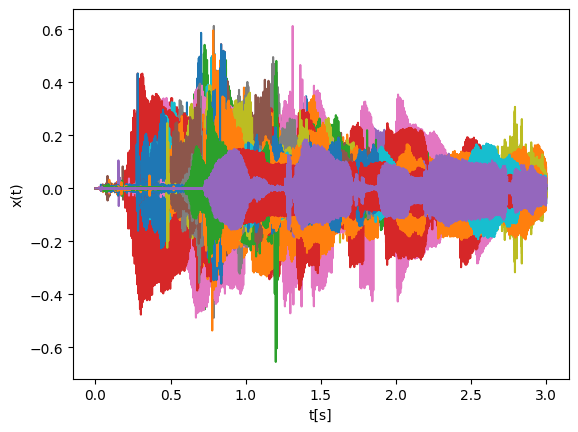

In [17]:
#grafica tiempo y fourier
plt.plot(np.arange(0,ts,1/fs),x_t.mean(axis=-1).T) #se promedian los dos canales stereo
plt.xlabel('t[s]')
plt.ylabel('x(t)')
plt.show()

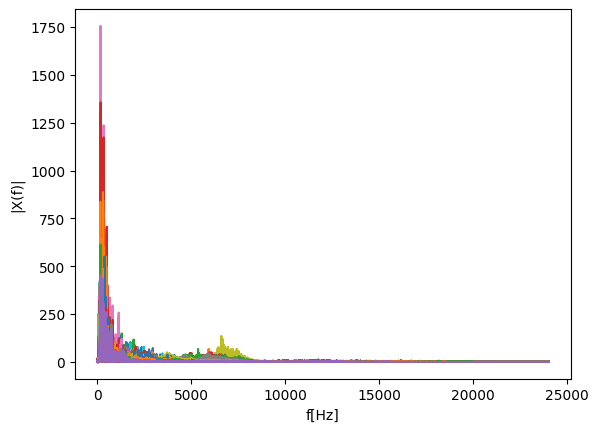

In [18]:
plt.plot(vf,abs(Xw).T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

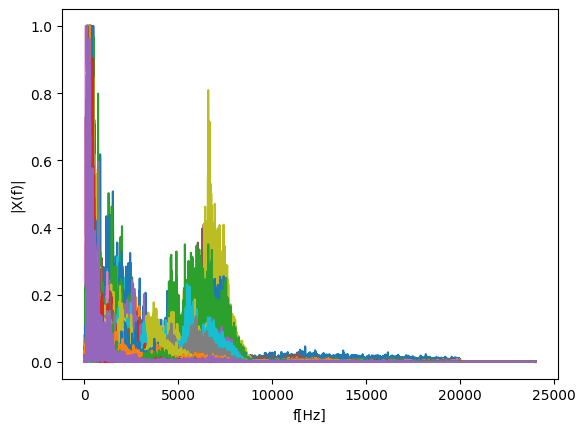

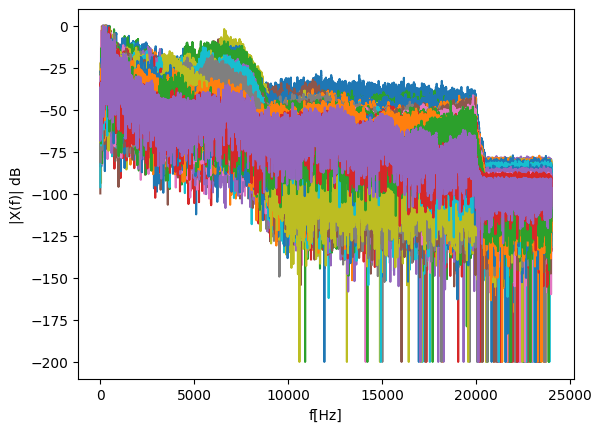

In [19]:
#se normalizan espectros entre 0 y 1 para evitar inconsistencias por ampliltudes máximas
from sklearn.preprocessing import MinMaxScaler
sca = MinMaxScaler()
Xw_ = sca.fit_transform(abs(Xw).T).T

plt.plot(vf,Xw_.T)
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)|')
plt.show()

#en dB
plt.plot(vf,(20*np.log10(Xw_+1e-10)).T) # se suma 1e-10 para evitar discontinuidad del log
plt.xlabel('f[Hz]')
plt.ylabel('|X(f)| dB')
plt.show()

In [20]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
#visualización de datos
red_ = TSNE(perplexity = 20,n_components=2,random_state=123,learning_rate='auto',init='pca')
#red_ = PCA(n_components=2,random_state=123)
fmax = 7000
X_2D = red_.fit_transform(Xw_[:,:fmax]) #se tiene en cuenta el espectro hasta fmax Hz

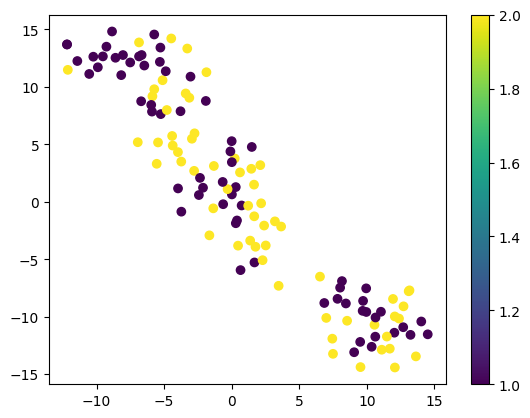

<ipython-input-21-6e94555dcd77>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])


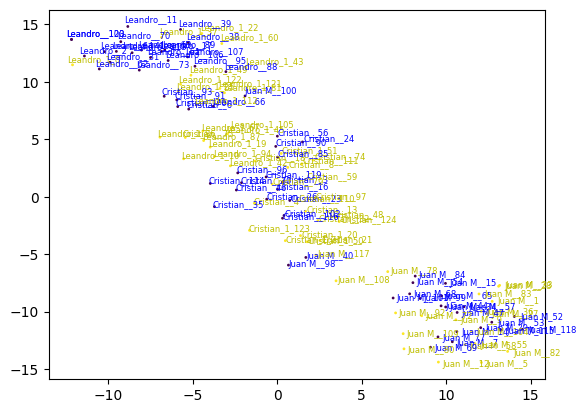

In [21]:
#graficar separabilidad 2D
plt.scatter(X_2D[:,0],X_2D[:,1],c=label)
plt.colorbar()
plt.show()

color_ = ["b","y"]
#nombre cancion
plt.scatter(X_2D[:,0],X_2D[:,1],c=label,s=1)
for i, tex in enumerate(name_c):
    #print(f"{i} {tex}")
    plt.text(X_2D[i,0]*1.025,X_2D[i,1]*1.025, tex[:-2]+"_"+str(i), fontsize=6,color=color_[int(label[i]-1)])

#plt.colorbar()
plt.show()

In [22]:
#reproducir audio
i=55
Audio(x_t[i].T,rate=fs)

In [23]:
i = 23
Audio(x_t[i].T,rate=fs)

In [24]:
i = 64
Audio(x_t[i].T,rate=fs)

In [25]:
import joblib
#guardar modelo
if not os.path.exists('modelo'):
    os.mkdir('modelo')
filename_ = 'modelo/palabras_clave'
model_ ={'Xw_':Xw_,'fmax': fmax, 'label' : label, 'name_c' : name_c, 'vf':vf,'fs':fs}
joblib.dump(model_,filename_+".pkl")


['modelo/palabras_clave.pkl']

In [26]:
#descargar modelo
#guardar resultados
from google.colab import files
from datetime import date, datetime
import shutil
#guardar resultados
namefile = str(datetime.now().strftime("%Y_%m_%d_%H_%M_%d"))+'modelo'
shutil.make_archive(namefile, 'zip', 'modelo')
files.download(namefile+'.zip')

#el archivo .zip puede cargarse en drive y utilizarse en otro cuaderno para detectar género musical de nuevos segmentos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
#cargar modelo
my_model_loaded = joblib.load(filename_+".pkl")
my_model_loaded.keys()

dict_keys(['Xw_', 'fmax', 'label', 'name_c', 'vf', 'fs'])